# FORCASTING

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression



In [60]:
df=pd.read_csv(r"C:\Users\Nagaraj Nagappan\Desktop\MLFlow2\final_fake_data.csv")

In [61]:
df=df.drop('Unnamed: 0', axis=1)

In [62]:
df

,Date,Inventory,Sales,After Sales,Load Count,Total Gallons Delivered,Day,Is Public Holiday,Temp-F,Month,Season,Demand,Sales % of Inventory,Average Load Volume,Average Sales per load,Inventory Turnover,Days of Inventory on Hand,Sales Growth Rate
0,2019-06-19,33981.120,30613.47,3367.65,4,30550,Wednesday,False,78.5,6,Summer,30613.47,90.09,7637.50,7653.37,0.90,1.11,0.00
1,2019-06-20,41851.722,27402.34,14449.38,5,37880,Thursday,False,79.0,6,Summer,27402.34,65.47,7576.00,5480.47,0.65,1.53,-10.49
2,2019-06-21,44027.074,27458.89,16568.18,1,7770,Friday,False,80.5,6,Summer,27458.89,62.37,7770.00,27458.89,0.62,1.60,0.21
3,2019-06-22,24683.161,13303.20,11379.96,3,22830,Saturday,False,79.0,6,Summer,13303.20,53.90,7610.00,4434.40,0.54,1.86,-51.55
4,2019-06-23,34343.323,11559.55,22783.77,1,7700,Sunday,False,80.0,6,Summer,11559.55,33.66,7700.00,11559.55,0.34,2.97,-13.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,2023-10-27,29249.333,25489.35,3759.98,6,28949,Friday,False,76.9,10,Autumn,25489.35,87.15,4824.83,4248.22,0.87,1.15,58.43
1587,2023-10-28,33953.073,20213.43,13739.64,3,23901,Saturday,False,70.5,10,Autumn,20213.43,59.53,7967.00,6737.81,0.60,1.68,-20.70
1588,2023-10-29,39282.705,21794.07,17488.64,4,32142,Sunday,False,78.1,10,Autumn,21794.07,55.48,8035.50,5448.52,0.55,1.80,7.82
1589,2023-10-30,24813.582,26506.10,-1692.52,3,30084,Monday,False,76.4,10,Autumn,26506.10,106.82,10028.00,8835.37,1.07,0.94,21.62


# 1. Data Preprocessing:


## setting index

In [63]:


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)



In [64]:
df.head()

,Inventory,Sales,After Sales,Load Count,Total Gallons Delivered,Day,Is Public Holiday,Temp-F,Month,Season,Demand,Sales % of Inventory,Average Load Volume,Average Sales per load,Inventory Turnover,Days of Inventory on Hand,Sales Growth Rate
Date,,,,,,,,,,,,,,,,,
2019-06-19,33981.120,30613.47,3367.65,4,30550,Wednesday,False,78.5,6,Summer,30613.47,90.09,7637.5,7653.37,0.90,1.11,0.00
2019-06-20,41851.722,27402.34,14449.38,5,37880,Thursday,False,79.0,6,Summer,27402.34,65.47,7576.0,5480.47,0.65,1.53,-10.49
2019-06-21,44027.074,27458.89,16568.18,1,7770,Friday,False,80.5,6,Summer,27458.89,62.37,7770.0,27458.89,0.62,1.60,0.21
2019-06-22,24683.161,13303.20,11379.96,3,22830,Saturday,False,79.0,6,Summer,13303.20,53.90,7610.0,4434.40,0.54,1.86,-51.55
2019-06-23,34343.323,11559.55,22783.77,1,7700,Sunday,False,80.0,6,Summer,11559.55,33.66,7700.0,11559.55,0.34,2.97,-13.11


In [65]:
df.tail(10)

,Inventory,Sales,After Sales,Load Count,Total Gallons Delivered,Day,Is Public Holiday,Temp-F,Month,Season,Demand,Sales % of Inventory,Average Load Volume,Average Sales per load,Inventory Turnover,Days of Inventory on Hand,Sales Growth Rate
Date,,,,,,,,,,,,,,,,,
2023-10-22,35871.185,16721.26,19149.92,2,30172,Sunday,False,71.5,10,Autumn,16721.26,46.61,15086.00,8360.63,0.47,2.15,-34.27
2023-10-23,37633.795,30280.79,7353.00,3,35278,Monday,False,70.6,10,Autumn,30280.79,80.46,11759.33,10093.60,0.80,1.24,81.09
2023-10-24,23067.663,23516.86,-449.20,2,39738,Tuesday,False,74.3,10,Autumn,23516.86,101.95,19869.00,11758.43,1.02,0.98,-22.34
2023-10-25,22638.315,27941.95,-5303.64,2,43987,Wednesday,False,72.7,10,Autumn,27941.95,123.43,21993.50,13970.98,1.23,0.81,18.82
2023-10-26,41628.464,16088.57,25539.89,4,25915,Thursday,False,72.5,10,Autumn,16088.57,38.65,6478.75,4022.14,0.39,2.59,-42.42
2023-10-27,29249.333,25489.35,3759.98,6,28949,Friday,False,76.9,10,Autumn,25489.35,87.15,4824.83,4248.22,0.87,1.15,58.43
2023-10-28,33953.073,20213.43,13739.64,3,23901,Saturday,False,70.5,10,Autumn,20213.43,59.53,7967.00,6737.81,0.60,1.68,-20.70
2023-10-29,39282.705,21794.07,17488.64,4,32142,Sunday,False,78.1,10,Autumn,21794.07,55.48,8035.50,5448.52,0.55,1.80,7.82
2023-10-30,24813.582,26506.10,-1692.52,3,30084,Monday,False,76.4,10,Autumn,26506.10,106.82,10028.00,8835.37,1.07,0.94,21.62


In [66]:
df.columns

Index(['Inventory', 'Sales', 'After Sales', 'Load Count',
       'Total Gallons Delivered', 'Day', 'Is Public Holiday', 'Temp-F',
       'Month', 'Season', 'Demand', 'Sales % of Inventory',
       'Average Load Volume', 'Average Sales per load', 'Inventory Turnover',
       'Days of Inventory on Hand', 'Sales Growth Rate'],
      dtype='object')

# VAR MODEL

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse

In [68]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

#### # Model Training and Evaluation


In [69]:
model = VAR(train[['Inventory', 'Sales', 'After Sales', 'Load Count', 'Total Gallons Delivered', 'Temp-F']])
model_fit = model.fit()

lag_order = model_fit.k_ar
forecast_input = test[['Inventory', 'Sales', 'After Sales', 'Load Count', 'Total Gallons Delivered', 'Temp-F']].values
predictions = model_fit.forecast(y=forecast_input, steps=len(test))
predictions



c:\Users\Nagaraj Nagappan\anaconda3\envs\vs_code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



array([[3.17207888e+04, 2.34917368e+04, 8.22905210e+03, 2.95677886e+00,
        3.55724096e+04, 7.95594674e+01],
       [3.27633085e+04, 2.45740083e+04, 8.18930019e+03, 2.94958297e+00,
        3.43960497e+04, 7.88170983e+01],
       [3.28656491e+04, 2.47453050e+04, 8.12034412e+03, 2.98956588e+00,
        3.41005565e+04, 7.80512025e+01],
       ...,
       [3.34829858e+04, 2.49786303e+04, 8.50435550e+03, 3.05910273e+00,
        3.29260207e+04, 7.32447327e+01],
       [3.34829829e+04, 2.49786328e+04, 8.50435012e+03, 3.05909726e+00,
        3.29260138e+04, 7.32447323e+01],
       [3.34829787e+04, 2.49786309e+04, 8.50434780e+03, 3.05909722e+00,
        3.29260150e+04, 7.32447323e+01]])

#### Evaluate the model


In [70]:
mse = mean_squared_error(test['Sales'], predictions[:, 0])
print(f'Mean Squared Error: {mse}')
rmse_val = rmse(test['Sales'], predictions[:, 0])
print(f'Root Mean Squared Error: {rmse_val}')

Mean Squared Error: 92379947.59989573
Root Mean Squared Error: 9611.448777364198


In [71]:
predictions

array([[3.17207888e+04, 2.34917368e+04, 8.22905210e+03, 2.95677886e+00,
        3.55724096e+04, 7.95594674e+01],
       [3.27633085e+04, 2.45740083e+04, 8.18930019e+03, 2.94958297e+00,
        3.43960497e+04, 7.88170983e+01],
       [3.28656491e+04, 2.47453050e+04, 8.12034412e+03, 2.98956588e+00,
        3.41005565e+04, 7.80512025e+01],
       ...,
       [3.34829858e+04, 2.49786303e+04, 8.50435550e+03, 3.05910273e+00,
        3.29260207e+04, 7.32447327e+01],
       [3.34829829e+04, 2.49786328e+04, 8.50435012e+03, 3.05909726e+00,
        3.29260138e+04, 7.32447323e+01],
       [3.34829787e+04, 2.49786309e+04, 8.50434780e+03, 3.05909722e+00,
        3.29260150e+04, 7.32447323e+01]])

# Data Visualisation

In [72]:
fig = px.line(test, x=test.index, y=['Sales'], title='Actual vs Predicted Sales')
fig.add_scatter(x=test.index, y=predictions[:, 0], mode='lines', name='Predicted')
fig.show()


# RANDOM FOREST

In [73]:
# Assuming 'df' is your DataFrame with a datetime index and 'Sales' column
X = df[['Inventory', 'After Sales', 'Load Count', 'Total Gallons Delivered', 'Temp-F']]
y = df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, rf_predictions)
rmse_rf = sqrt(mse_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'Root Mean Squared Error (Random Forest): {rmse_rf}')


Mean Squared Error (Random Forest): 274326.4298056642
Root Mean Squared Error (Random Forest): 523.7618063639846


In [74]:
rf_predictions

array([13952.5931, 22579.1323, 26875.4115, 23426.5782, 26261.9725,
       13095.2657, 26845.8368, 22867.0055, 24366.3954, 25413.3119,
       25081.9143, 18172.4519, 23977.7945, 29351.6422, 31924.2809,
       23551.2176, 15389.1456, 16990.2342, 34250.8351, 35450.4155,
       29766.7855, 24846.8765, 26836.2431, 26512.5028, 24864.8612,
       32269.3945, 22912.6038, 23378.1374, 23313.029 , 17715.7136,
       29109.2225, 32283.5831, 27204.6289, 24115.2396, 27533.1361,
       30992.0491, 31029.6972, 21481.6963, 27411.8867, 25622.9309,
       22122.6112, 14515.1554, 19814.8833, 25990.973 , 24634.5343,
       20162.2812, 26105.8891, 26771.8482, 28653.8486, 29864.2798,
       29412.0209, 18961.784 , 26007.9853, 23742.2408, 14242.0839,
       25550.9654, 16621.6053, 33183.3077, 31716.3047, 21090.8462,
       19240.9058, 15148.1371, 23223.3692, 25586.8149, 27842.2011,
       29586.1781, 27874.3089, 17298.3402, 25037.0885, 31965.2651,
       20176.325 , 20175.8005, 27542.229 , 18401.8716, 22274.8

In [75]:
# Calculate RMSE for the test set
rmse_test = sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate accuracy in percentage for the test set
accuracy_test = 100 * (1 - (rmse_test / y_test.mean()))
print(f'Accuracy (Test Set): {accuracy_test:.2f}%')

Accuracy (Test Set): 97.89%


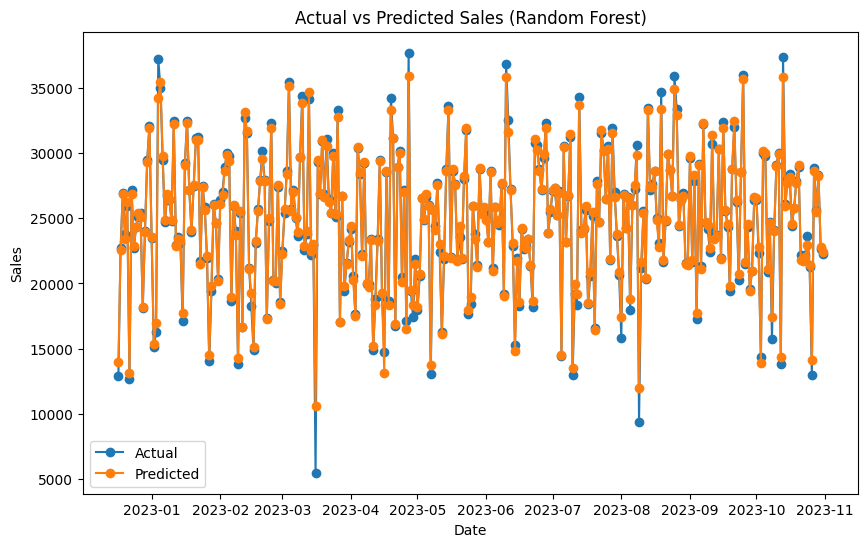

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual', marker='o')
plt.plot(test.index, rf_predictions, label='Predicted', marker='o')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [77]:
import plotly.graph_objects as go

trace_actual = go.Scatter(x=test.index, y=y_test, mode='markers', name='Actual')
trace_predicted = go.Scatter(x=test.index, y=rf_predictions, mode='markers', name='Predicted')

# Create layout
layout = go.Layout(
    title='Actual vs Predicted Sales (Random Forest)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Sales'),
    showlegend=True
)

# Create figure
fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)

# Show figure
fig.show()


In [78]:
next_15_days = pd.date_range(start=test.index[-1] + pd.DateOffset(1), periods=15, freq='D')
sample_data = pd.DataFrame(index=next_15_days, columns=['Inventory', 'After Sales', 'Load Count', 'Total Gallons Delivered', 'Temp-F'])



In [79]:
for column in sample_data.columns:
    sample_data[column] = np.random.choice(df[column], size=len(sample_data))



In [80]:
sample_data

,Inventory,After Sales,Load Count,Total Gallons Delivered,Temp-F
2023-11-01,36473.142,3874.01,4,36595,77.9
2023-11-02,44063.159,-2711.43,3,28858,70.4
2023-11-03,29292.524,-5631.60,3,31164,78.3
2023-11-04,29412.098,1158.90,4,23901,77.9
2023-11-05,42485.060,21440.59,2,32696,79.5
2023-11-06,36932.230,12842.27,3,40455,78.3
2023-11-07,40259.688,8506.06,3,32633,74.8
2023-11-08,40845.723,4449.65,2,30728,78.6
2023-11-09,33038.305,22364.34,3,39453,50.0
2023-11-10,41130.917,5817.25,3,37592,70.5


In [81]:
# Make predictions for the next 15 days using your trained Random Forest model
sample_predictions = rf_model.predict(sample_data)

In [82]:
sample_predictions

array([32338.3318, 37649.1519, 34122.8278, 28356.1664, 20763.5834,
       23920.1275, 31782.1515, 35537.2885, 12826.4664, 34815.3463,
       15854.4084, 18731.5543, 35780.0349, 27974.2897, 22581.7965])

In [83]:


trace_actual = go.Scatter(x=test.index, y=y_test, mode='markers', name='Actual')
trace_predicted_test_set = go.Scatter(x=test.index, y=rf_predictions, mode='markers', name='Predicted (Test Set)')

# Create trace for the forecast of the next 15 days
trace_forecast_next_15_days = go.Scatter(x=sample_data.index, y=sample_predictions, mode='markers', name='Forecast (Next 15 Days)')

# Create layout
layout = go.Layout(
    title='Actual vs Predicted Sales (Random Forest)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Sales'),
    showlegend=True
)

# Create figure
fig = go.Figure(data=[trace_actual, trace_predicted_test_set, trace_forecast_next_15_days], layout=layout)

# Show figure
fig.show()

